In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv(r'C:\Users\Dell\Downloads\FuelConsumption.csv')

In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [8]:
new_df=df[['ENGINESIZE','CYLINDERS','FUELTYPE','FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
new_df

,ENGINESIZE,CYLINDERS,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,Z,9.9,6.7,8.5,196
1,2.4,4,Z,11.2,7.7,9.6,221
2,1.5,4,Z,6.0,5.8,5.9,136
3,3.5,6,Z,12.7,9.1,11.1,255
4,3.5,6,Z,12.1,8.7,10.6,244
...,...,...,...,...,...,...,...
1062,3.0,6,X,13.4,9.8,11.8,271
1063,3.2,6,X,13.2,9.5,11.5,264
1064,3.0,6,X,13.4,9.8,11.8,271
1065,3.2,6,X,12.9,9.3,11.3,260


<AxesSubplot:>

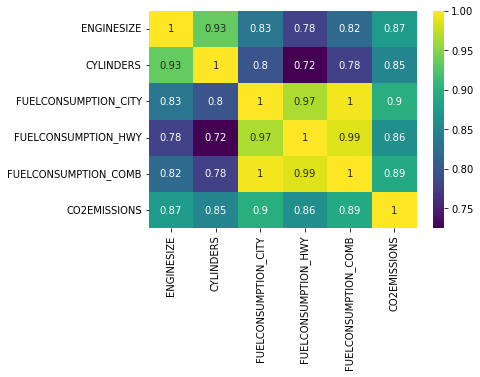

In [9]:
sns.heatmap(new_df.corr(),annot=True,cmap='viridis')

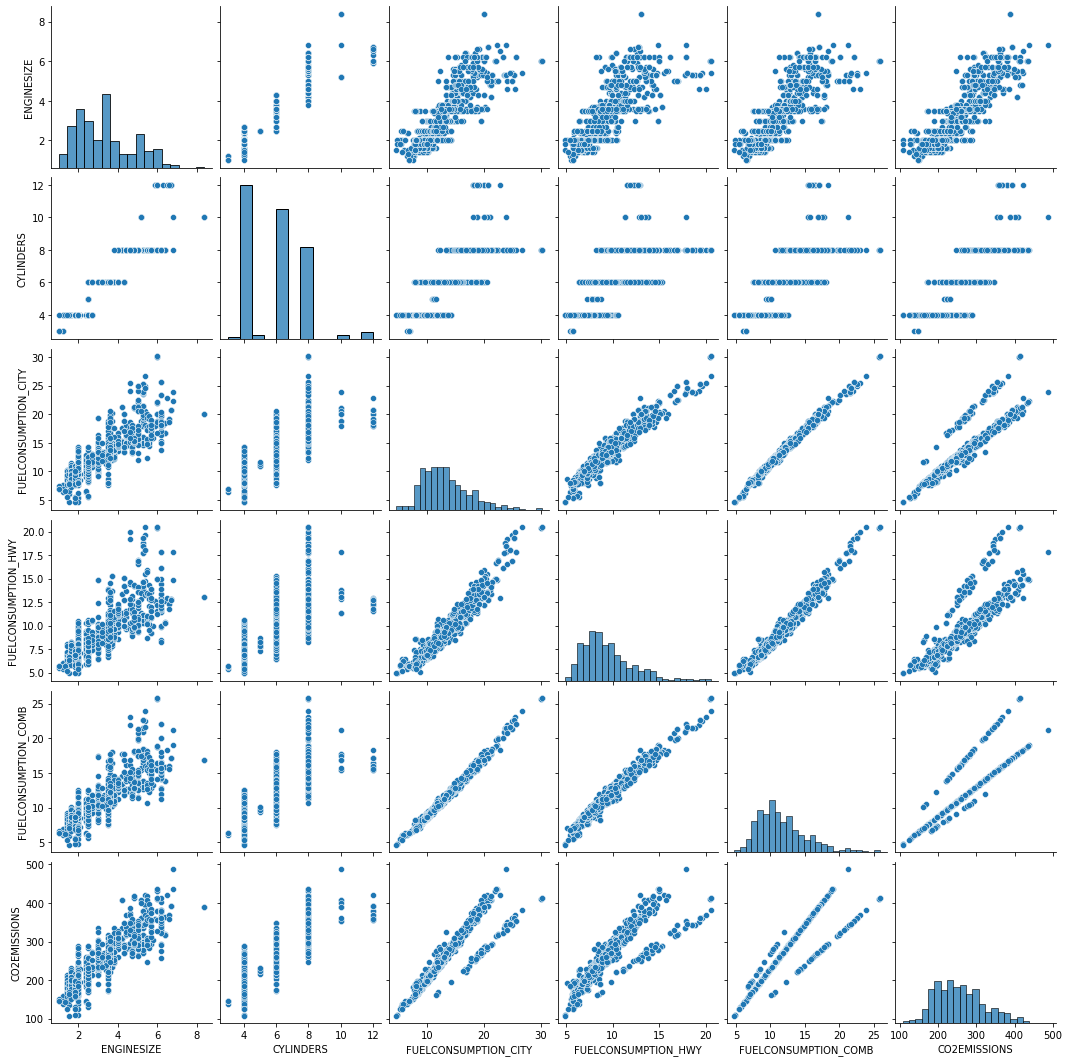

In [10]:
sns.pairplot(new_df)

In [11]:
X=new_df.drop('CO2EMISSIONS',axis=1).values

In [12]:
y=new_df['CO2EMISSIONS'].values

In [14]:
new_df['FUELTYPE'].unique()

array(['Z', 'D', 'X', 'E'], dtype=object)

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=1/3,random_state=0)

In [18]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(xtrain,ytrain)

LinearRegression()

In [20]:
reg.coef_

array([ 52.57891398, -96.3018887 ,  21.95113865,  21.77183607,
         0.79093879,   0.99812467,  -6.10535459,  -6.7018903 ,
        33.76143196])

In [21]:
reg.intercept_

-10.898944547917779

In [22]:
y_pred=reg.predict(xtest)

In [24]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
print('mean absolute error',mean_absolute_error(ytest,y_pred))
print('R2 score',r2_score(ytest,y_pred))

mean absolute error 3.567946591595805
R2 score 0.9881507263178071


In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(xtrain)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, ytrain)

LinearRegression()

In [28]:
y_pred1 = lin_reg.predict(poly_reg.transform(xtest))
print('Mean Absolute Error = ',mean_absolute_error(ytest,y_pred1))
print('R2 score = ',r2_score(ytest,y_pred1))

Mean Absolute Error =  0.2953556896595473
R2 score =  0.9999575649524235
